In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [135]:
df = pd.read_csv("partialcharge/partial_charge.csv")
df

,X,00,005,m005,01,m01,02,m02,03,m03,05,m05
0,-35,0.00000,0.00000,0.00000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,-34,-0.00275,-0.00460,0.00280,0.0074,-0.0044,0.00065,-0.00530,0.00285,-0.00290,0.01255,-0.00865
2,-33,-0.00420,0.00015,0.00310,0.0024,-0.0060,0.00505,-0.01125,-0.00460,-0.01905,0.01685,-0.01175
3,-32,-0.00455,-0.00125,0.00490,0.0037,-0.0087,0.01080,-0.01150,-0.00375,-0.01230,0.02065,-0.02160
4,-31,-0.01100,-0.00215,0.01875,0.0045,-0.0062,0.01695,-0.01140,-0.00270,-0.01735,0.02000,-0.03075
...,...,...,...,...,...,...,...,...,...,...,...,...
66,31,-0.01100,-0.00215,0.01875,0.0045,-0.0062,0.01695,-0.01140,-0.00270,-0.01735,0.02000,-0.03075
67,32,-0.00455,-0.00125,0.00490,0.0037,-0.0087,0.01080,-0.01150,-0.00375,-0.01230,0.02065,-0.02160
68,33,-0.00420,0.00015,0.00310,0.0024,-0.0060,0.00505,-0.01125,-0.00460,-0.01905,0.01685,-0.01175
69,34,-0.00275,-0.00460,0.00280,0.0074,-0.0044,0.00065,-0.00530,0.00285,-0.00290,0.01255,-0.00865


In [136]:
df2 = df.copy()

evkcal = 23
df2 = df2.div(evkcal)
df2['X'] = df2['X'].mul(evkcal)

Text(0, 0.5, '$\\Delta$G (kcal/mol)')

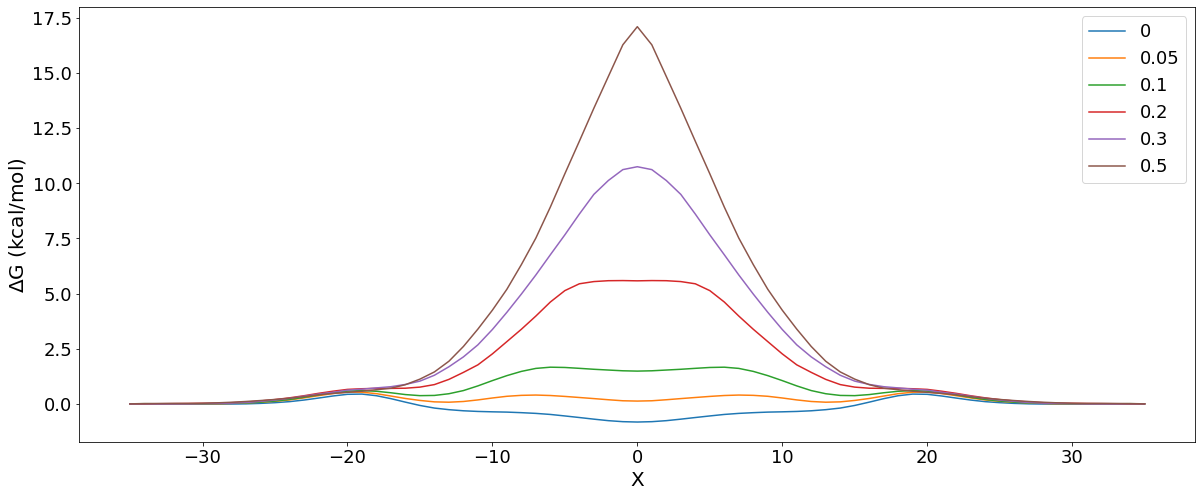

In [137]:
charge = [0,0.05,0.1,0.2,0.3,0.5]
ax = df.plot(x='X',y=['00','005','01','02','03','05'],figsize=(20,8), fontsize=18)
ax.legend(charge, loc=1, fontsize=18)
ax.set_xlabel('X',fontsize = 20)
ax.set_ylabel(r'$\Delta$G (kcal/mol)', fontsize=20)

### It's actually was incorrect representation of potential, so I reverted to $\Delta$ G

Text(0, 0.5, '$\\Delta$G (kcal/mol)')

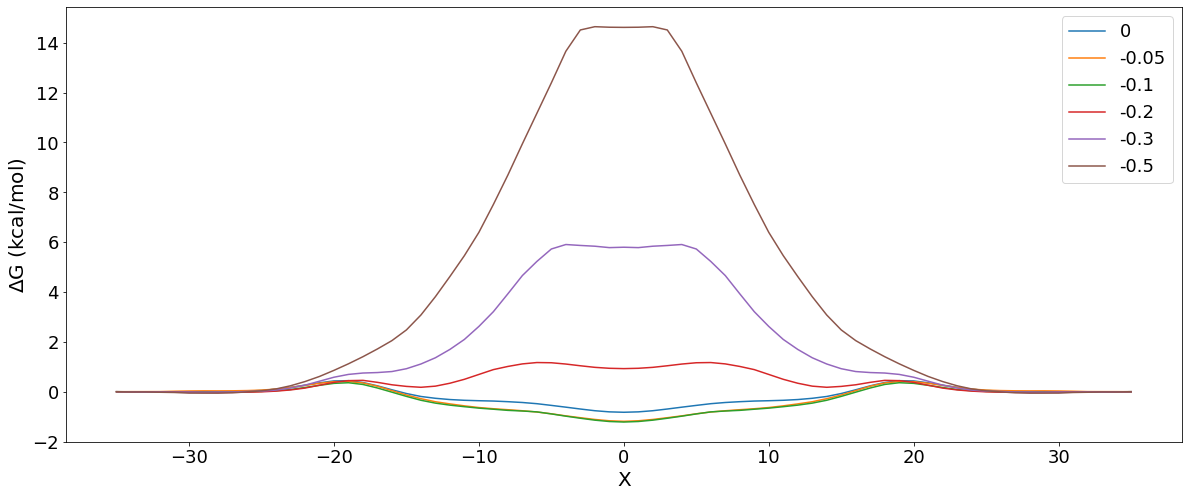

In [138]:
charge = [0,-0.05,-0.1,-0.2,-0.3,- 0.5]
ax = df.plot(x='X',y=['00','m005','m01','m02','m03','m05'],figsize=(20,8), fontsize=18)
ax.legend(charge, loc=1, fontsize=18)
ax.set_xlabel('X',fontsize = 20)
ax.set_ylabel(r'$\Delta$G (kcal/mol)', fontsize=20)

In [139]:
charge = [0.05,0.1,0.2,0.3,0.5]
n = ['005','01','02','03','05']

### Born solvation energy and interaction with a field.  i.e.  the free energy for moving from water to a point z is: $\Delta G(z;q) = q^{2}/(8\pi\epsilon_{0}R) [-1/\epsilon_w + 1/\epsilon(z;q)]  +  q \Phi(z;q) + \Delta G(z;q=0)$; In this model, the difference in profiles between cation and anion is $\Delta \Delta G(z;|q|) = 2q\Phi(z;|q|)$. 
### $\Phi(𝑧;|𝑞|)$ is plotted below.

Text(0, 0.5, '$\\phi$(V)')

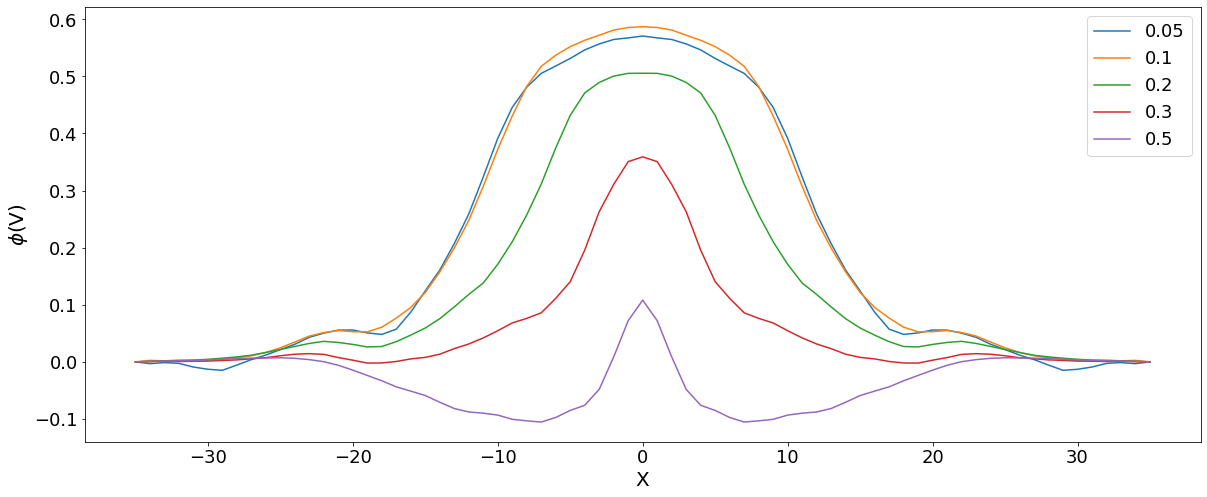

In [140]:
b = pd.DataFrame({'X':df2['X']})

for c in charge:
    name = str(c).replace('.','')
    newn = "m" + name
    a =  (df2[name] - df2[newn])/ (2*c) 
    q2 = pd.DataFrame({'q2_' + name :a})
    b = b.join(q2)
ax = b.plot(x='X',figsize=(20,8), fontsize=18)
ax.legend(charge,loc=1, fontsize=18)
ax.set_xlabel('X',fontsize = 20)
ax.set_ylabel(r'$\phi$(V)', fontsize=20)

### Scaled q2 term; $q^{2}/(8\pi\epsilon_{0}R) [-1/\epsilon_w + 1/\epsilon(z;q)] = 1/2( \Delta G(z;q) + \Delta G(z;-q) - 2 \Delta G(z;q=0))$

Text(0, 0.5, '$\\Delta$G (kcal/mol),q=1 ')

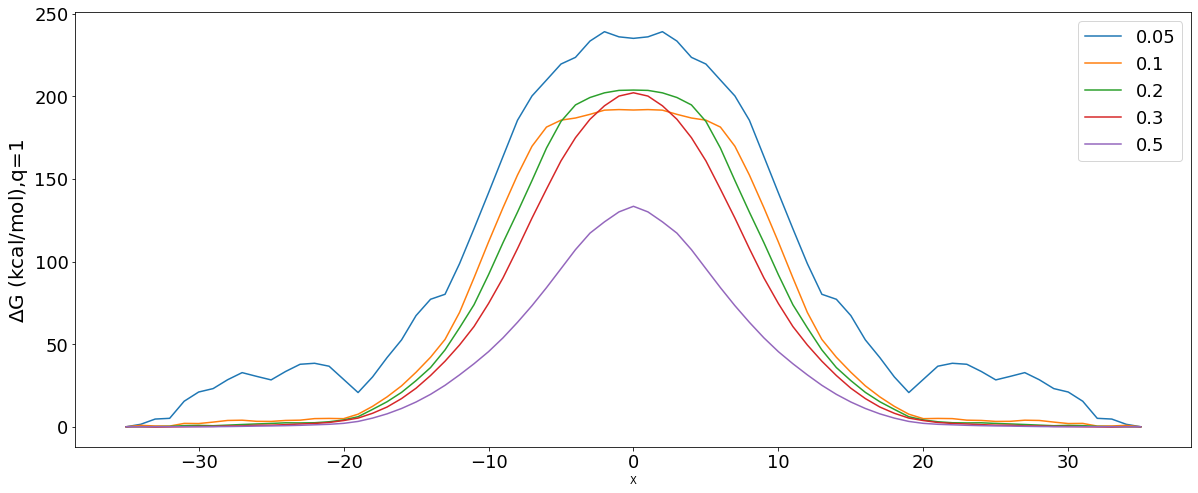

In [142]:
b = pd.DataFrame({'X':df2['X']})

for c in charge:
    name = str(c).replace('.','')
    newn = "m" + name
    a = (df[newn] + df[name] -  2*df['00'] ) / (c**2)
    #    a = (df2[newn] + df2[name] - 2*df['00']) 
    q2 = pd.DataFrame({'q2_' + name :a})
    b = b.join(q2)
ax = b.plot(x='X',figsize=(20,8), fontsize=18)
ax.legend(charge,loc=1, fontsize=18)
ax.set_ylabel(r'$\Delta$G (kcal/mol),q=1 ', fontsize=20)

###  $\epsilon$ from above

Text(0, 0.5, '$\\epsilon$')

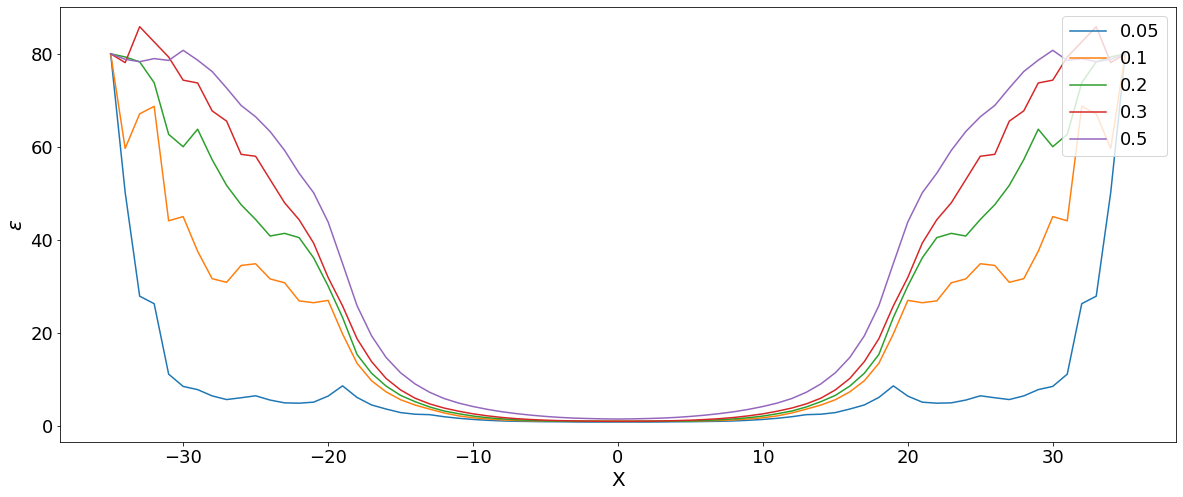

In [146]:
b = pd.DataFrame({'X':df2['X']})

for c in charge:
    name = str(c).replace('.','')
    newn = "m" + name
    a = (df2[newn] + df2[name] - 2*df2['00']) 
    e0 = 8.854187812813*(10**(-12))
    ew = 80
    e = 1.60217634*(10**(-19))
#    bornr = 1.66*(10**(-10))
    bornr = 1.66*(10**(-10))
    kcalj = 6.9477*((10)**(-21))
    evj = 1.60218*((10)**(-19))
    epsz = (1/(1/ew+a*4*np.pi*e0*evj*bornr/(c*e)**(2)))

    q2 = pd.DataFrame({'q2_' + name :epsz})
    b = b.join(q2)
ax = b.plot(x='X',figsize=(20,8), fontsize=18)
ax.legend(charge,loc=1, fontsize=18)
ax.set_xlabel('X',fontsize = 20)
ax.set_ylabel(r'$\epsilon$', fontsize=20)

### Now, this doesn't look like previous profile, and certainly not as expected.